# Séance big data

Découverte de plusieurs façons de calculer des statistiques sur des fichiers volumineux.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Les données

On récupère un fichier de la [DAMIR](https://www.data.gouv.fr/fr/datasets/open-damir-base-complete-sur-les-depenses-dassurance-maladie-inter-regimes/). Le fichier une fois décompressé fait plus de quatre Go. Vous pouvez le télécharger directement depuis le site ou prendre une version de backup. Vous trouvez d'autres données intéressantes sur le sujet sur le projet [SGMAP-AGD/DAMIR](https://github.com/SGMAP-AGD/DAMIR).

In [3]:
import os
filename = "bigdata/A201612_small.csv"
# pour travailler avec un fichier plus gros (4 Go)
# filename = "bigdata/A201612.csv"
xlsfile = "bigdata/Lexique_open-DAMIR.xls"
if not os.path.exists(filename):
    from pyensae.datasource import download_data
    if not os.path.exists("bigdata"):
        os.mkdir("bigdata")
    filenamegz = filename.replace(".csv", ".csv.gz")
    download_data(os.path.split(filenamegz)[-1], whereTo=".")
    download_data(os.path.split(xlsfile)[-1], whereTo="bigdata")
    if not os.path.exists(filename):
        filename = os.path.split(filename)[-1]

In [4]:
os.stat(filename).st_size / 2**30

0.015162252821028233

Il est impossible de le charger en mémoire en entier. On regarde les premières lignes.

In [5]:
with open(filename, "r") as f:
    for i, line in enumerate(f):
        print(line.strip("\r\n"))
        if i >= 5:
            break

FLX_ANN_MOI;ORG_CLE_REG;AGE_BEN_SNDS;BEN_RES_REG;BEN_CMU_TOP;BEN_QLT_COD;BEN_SEX_COD;DDP_SPE_COD;ETE_CAT_SNDS;ETE_REG_COD;ETE_TYP_SNDS;ETP_REG_COD;ETP_CAT_SNDS;MDT_TYP_COD;MFT_COD;PRS_FJH_TYP;PRS_ACT_COG;PRS_ACT_NBR;PRS_ACT_QTE;PRS_DEP_MNT;PRS_PAI_MNT;PRS_REM_BSE;PRS_REM_MNT;FLT_ACT_COG;FLT_ACT_NBR;FLT_ACT_QTE;FLT_PAI_MNT;FLT_DEP_MNT;FLT_REM_MNT;SOI_ANN;SOI_MOI;ASU_NAT;ATT_NAT;CPL_COD;CPT_ENV_TYP;DRG_AFF_NAT;ETE_IND_TAA;EXO_MTF;MTM_NAT;PRS_NAT;PRS_PPU_SEC;PRS_REM_TAU;PRS_REM_TYP;PRS_PDS_QCP;EXE_INS_REG;PSE_ACT_SNDS;PSE_ACT_CAT;PSE_SPE_SNDS;PSE_STJ_SNDS;PRE_INS_REG;PSP_ACT_SNDS;PSP_ACT_CAT;PSP_SPE_SNDS;PSP_STJ_SNDS;TOP_PS5_TRG;

201612;76;20;76;9;1;1;0;1101;76;1;76;1101;9;3;0;2;1;1;0;46;46;46;2;1;1;46;0;46;2016;12;40;0;0;9;99;1;99;9;1117;1;100;99;3;99;0;0;14;2;99;0;0;1;2;9;

201612;28;30;28;9;1;2;0;9999;99;99;24;1102;9;99;0;1;5;1;0;.51;.51;.51;1;5;1;.51;0;.51;2016;12;10;0;0;9;99;9;99;9;3380;2;100;99;31;28;50;2;0;1;99;0;0;6;2;9;



On calcule le nombre de lignes :

In [6]:
with open(filename, "r") as f:
    nb = 0
    for line in f:
        nb += 1
nb

199999

On peut aussi utiliser [pandas.read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) pour regarder les premières lignes.

In [7]:
import time
import pandas
begin = time.perf_counter()
df = pandas.read_csv(filename, sep=";", nrows=100)
print(time.perf_counter() - begin)

0.02099410000002422


In [8]:
df.head()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,201612,76,20,76,9,1,1,0,1101,76,...,0,14,2,99,0,0,1,2,9,NaN
1,201612,28,30,28,9,1,2,0,9999,99,...,2,0,1,99,0,0,6,2,9,NaN
2,201612,27,60,93,9,2,1,0,9999,99,...,2,0,9,93,0,1,1,9,9,NaN
3,201612,32,40,32,9,2,2,0,9999,99,...,1,1,1,32,0,1,1,1,9,NaN
4,201612,32,30,32,9,1,2,0,2206,32,...,0,0,2,99,0,0,1,2,9,NaN


In [9]:
df.head().T

,0,1,2,3,4
FLX_ANN_MOI,201612.0,201612.00,201612.0,201612.0,201612.0
ORG_CLE_REG,76.0,28.00,27.0,32.0,32.0
AGE_BEN_SNDS,20.0,30.00,60.0,40.0,30.0
BEN_RES_REG,76.0,28.00,93.0,32.0,32.0
BEN_CMU_TOP,9.0,9.00,9.0,9.0,9.0
BEN_QLT_COD,1.0,1.00,2.0,2.0,1.0
BEN_SEX_COD,1.0,2.00,1.0,2.0,2.0
DDP_SPE_COD,0.0,0.00,0.0,0.0,0.0
ETE_CAT_SNDS,1101.0,9999.00,9999.0,9999.0,2206.0
ETE_REG_COD,76.0,99.00,99.0,99.0,32.0


In [10]:
variables = pandas.read_excel(xlsfile, skiprows=2)
cols = variables.columns[:2]
variables[cols].dropna()

,AGE_BEN_SNDS,Tranche d'Age Bénéficiaire au moment des soins
0,ASU_NAT,Nature d'Assurance
1,ATT_NAT,Nature de l'Accident du Travail
2,BEN_CMU_TOP,Top Bénéficiaire CMU-C
3,BEN_QLT_COD,Qualité du Bénéficiaire
4,BEN_RES_ZEAT,ZEAT de Résidence du Bénéficiaire
5,BEN_SEX_COD,Sexe du Bénéficiaire
6,CPL_COD,Complément d'Acte
7,CPT_ENV_TYP,Type d'Enveloppe
8,DDP_SPE_COD,Discipline de Prestation Etb Exécutant
9,DRG_AFF_NAT,Nature du Destinataire de Règlement affiné


## Répartition des dépenses selon l'âge

C'est la variable ``AGE_BEN_SNDS`` mais on ne peut toujours pas charger le fichier en mémoire.

### Itérateur sur des dataframes

Il faut utiliser le paramètre [iterator](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [11]:
dfs = []
for i, df in enumerate(pandas.read_csv(filename, 
            sep=";", iterator=True, chunksize=10000)):
    dfs.append(df)
    if i >= 5:
        break        
dfs[0].head()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,201612,76,20,76,9,1,1,0,1101,76,...,0,14,2,99,0,0,1,2,9,NaN
1,201612,28,30,28,9,1,2,0,9999,99,...,2,0,1,99,0,0,6,2,9,NaN
2,201612,27,60,93,9,2,1,0,9999,99,...,2,0,9,93,0,1,1,9,9,NaN
3,201612,32,40,32,9,2,2,0,9999,99,...,1,1,1,32,0,1,1,1,9,NaN
4,201612,32,30,32,9,1,2,0,2206,32,...,0,0,2,99,0,0,1,2,9,NaN


Il faut calculer la distribution des âges pour chaque dataframe.

In [12]:
from datetime import datetime
ages = []
for i, df in enumerate(pandas.read_csv(filename, 
                    sep=";", iterator=True, chunksize=10000)):
    sub = df[["AGE_BEN_SNDS", "PRS_REM_MNT"]].copy()
    gr = sub.groupby("AGE_BEN_SNDS").sum()
    ages.append(gr)
    if len(ages) % 100 == 0:
        print(datetime.now(), len(ages), "lignes", 10000 * len(ages))

Les versions de pandas ont quelques différences. Voici celle utilisées pour ce notebook.

In [13]:
pandas.__version__

'1.1.0'

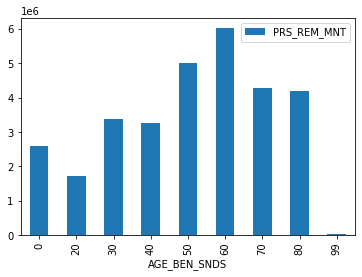

In [14]:
age = pandas.concat(ages)
agg = age.groupby("AGE_BEN_SNDS").sum()
agg.plot(kind="bar");

Difficile d'interpréter ce graphique sans le comparer à la pyramide des âges mais ce n'est pas l'objectif ici. Chaque statistique prend un peu de temps. Et si nous tirions un échantillon aléatoire à 1%.

## Echantillon

In [15]:
ech = []
for i, df in enumerate(pandas.read_csv(filename, 
                    sep=";", iterator=True, chunksize=10000)):
    sub = df.sample(frac=0.01)
    ech.append(sub)
    if len(ech) % 100 == 0:
        print(datetime.now(), len(ech), "lignes", 10000 * len(ech))

In [16]:
echantillon = pandas.concat(ech)
echantillon.shape

(1000, 56)

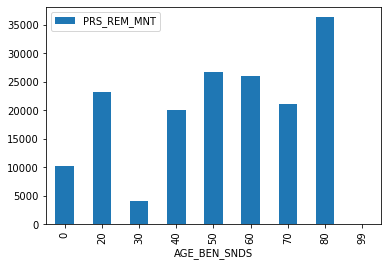

In [17]:
echantillon[["AGE_BEN_SNDS", "PRS_REM_MNT"]] \
        .groupby("AGE_BEN_SNDS").sum().plot(kind="bar");

## pickle

Le module [pickle](https://docs.python.org/3/library/pickle.html) permet de [sérialiser](https://fr.wikipedia.org/wiki/S%C3%A9rialisation). Cette opération transforme le contenu d'un objet tel qu'il est en mémoire en une séquence d'octets qu'on peut alors enregistrer sur disque. Comme ce format de fichier est plus proche de la mémoire, il se charge beaucoup plus vite. Cela permet de gagner un peu de temps. L'inconvénient est que ce format n'est pas toujours compatible d'une version de python ou pandas à l'autre.

In [18]:
echantillon.to_csv("echantillon.csv", sep=";", index=False)

In [19]:
import os
os.stat("echantillon.csv").st_size / 2**20

0.16968822479248047

In [20]:
begin = time.perf_counter()
ech2 = pandas.read_csv("echantillon.csv", sep=";")
print(time.perf_counter()-begin)

0.025167299999992565


In [21]:
ech2.shape

(1000, 56)

In [22]:
echantillon.to_pickle("echantillon.pickle")

In [23]:
begin = time.perf_counter()
ech3 = pandas.read_pickle("echantillon.pickle")
print(time.perf_counter()-begin)

0.011920500000002221


### SQLite3

Un échantillon fait disparaître les classes les moins représentées. On peut accélérer le traitement en passant par [Sqlite](https://www.sqlite.org/) et disponible via le module [sqlite](https://docs.python.org/3.6/library/sqlite.html). Première étape : créer la base.

In [24]:
import sqlite3
cnx = sqlite3.connect('damir2.db3')

In [25]:
for i, df in enumerate(pandas.read_csv(filename, 
            sep=";", iterator=True, chunksize=100000)):
    df.to_sql(con=cnx, name="damir", if_exists="replace" if i == 0 else "append")
    if (i+1) % 10 == 0:
        print(datetime.now(), (i+1) * 100000, "lignes")
print("done")

c:\python372_x64\lib\site-packages\pandas\core\generic.py:2612: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


done


C'est un peu long mais le calcul de statistique est plus rapide par la suite.

In [26]:
import time
begin = time.perf_counter()
dfage = pandas.read_sql(
    'select AGE_BEN_SNDS, count(*) from damir group by AGE_BEN_SNDS', cnx)
print("time", time.perf_counter() - begin)
dfage

time 0.08782719999999244


,AGE_BEN_SNDS,count(*)
0,0,10424
1,20,10948
2,30,10871
3,40,11963
4,50,14475
5,60,15662
6,70,13220
7,80,12281
8,99,155


On peut aussi programmer des [commandes magiques](http://www.xavierdupre.fr/app/pyensae/helpsphinx/notebooks/pyensae_sql_magic.html) pour alléger la syntaxe.

In [27]:
%load_ext pyensae

In [28]:
%SQL_connect damir.db3

In [29]:
%SQL_tables

[]

In [30]:
%%SQL
SELECT * FROM damir LIMIT 5

unable to execute a SQL request (1)(file damir.db3)
SELECT * FROM damir LIMIT 5
no such table: damir
'SELECT * FROM damir LIMIT 5'


In [31]:
%lsmagic

Available line magics:
%SQL  %SQL_add_function  %SQL_close  %SQL_connect  %SQL_drop_table  %SQL_import_df  %SQL_import_tsv  %SQL_refresh_completion  %SQL_schema  %SQL_tables  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %encoding  %env  %grep  %gui  %head  %hhelp  %hist  %history  %jsdf  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lsr  %lsrepo  %macro  %magic  %matplotlib  %mkdir  %more  %mpl_style  %nb_menu  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tail  %tb  %time  %

### dask

[dask](http://dask.pydata.org/en/latest/) fonctionne un peu comme pandas excepté que l'exécution des requêtes est différée. On utilise [read_csv](http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.read_csv).

In [32]:
import dask.dataframe
dfdk = dask.dataframe.read_csv(filename, sep=";")
dfdk.head(n=2)

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,201612,76,20,76,9,1,1,0,1101,76,...,0,14,2,99,0,0,1,2,9,NaN
1,201612,28,30,28,9,1,2,0,9999,99,...,2,0,1,99,0,0,6,2,9,NaN


Les trois lignes qui suivent sont très rapides.

In [33]:
import dask
dask.__version__

'2.12.0'

In [34]:
dfdk2 = dfdk[["AGE_BEN_SNDS", "PRS_REM_MNT"]]
grdk = dfdk2.groupby("AGE_BEN_SNDS").sum()

La suivante, beaucoup moins.

In [35]:
begin = time.perf_counter()
res = grdk.compute()
print(time.perf_counter() - begin)

0.5088113999999848


In [36]:
ech4 = dfdk.sample(frac=0.01)

In [37]:
dfech = ech4.compute()

In [38]:
type(dfech)

pandas.core.frame.DataFrame

In [39]:
res

,PRS_REM_MNT
AGE_BEN_SNDS,
0,2607345.16
20,1714894.46
30,3378001.46
40,3271108.13
50,5011475.59
60,6026792.72
70,4283277.72
80,4181565.36
99,19015.33


C'est plus qu'avec SQLite3 mais dans cet exemple, dask relit le fichier à chaque calcul car il ne stocke pas un dataframe dans un format intermédiaire plus efficace tel que [parquet](http://parquet.apache.org/). dask propose des idées pour optimiser les calculs [Dask DataFrame Performance Tips](http://dask.pydata.org/en/latest/dataframe-performance.html).

### bcolz

[bcolz](https://github.com/Blosc/bcolz) organise différemment les données : par colonnes au lieu des lignes. Cela nécessite le plus souvant un stockage intermédiaire sur disque : [to_bcolz](https://github.com/dask/dask/pull/1386/files). Une fois transformées, les données livrent plus vite des statistiques sur une colonne.

## Grandes matrices

Les dataframes acceptent un type différent pour chaque colonne. Si toutes les colonnes sont numériques et de même types, on peut s'orienter vers d'autres solutions.

### Zarr

[zarr](http://zarr.readthedocs.io/en/latest/) permet de manipuler des matrices qui ne tiennent pas en mémoire de la même façon que [numpy](http://www.numpy.org/). Les données sont compressés et parfois stockées sur disque. Ce module masque beaucoup de détails en proposant une interface connue.

In [41]:
import zarr
z = zarr.zeros((10000, 10000), chunks=(1000, 1000), dtype='i4')
z

<zarr.core.Array (10000, 10000) int32>

In [42]:
z[4,5]

0

Voir aussi [wendelin.core](https://pypi.python.org/pypi/wendelin.core), [hdf5](http://www.h5py.org/).

## Formats compressés

* [sparse dataframes](https://pandas.pydata.org/pandas-docs/stable/sparse.html#)
* [scipy](https://docs.scipy.org/doc/scipy-0.18.1/reference/sparse.html)